라이브러리 로드

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


학습,예측 데이터셋 나누기

In [37]:
(df["Insulin"]>0).value_counts()

True     394
False    374
Name: Insulin, dtype: int64

In [38]:
#train 세트를 만들기
train = df[df["Insulin"]>0].copy()
train.shape

(394, 9)

In [39]:
#test 세트를 만들기

test = df[df["Insulin"] == 0].copy()
test.shape

(374, 9)

EDA

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

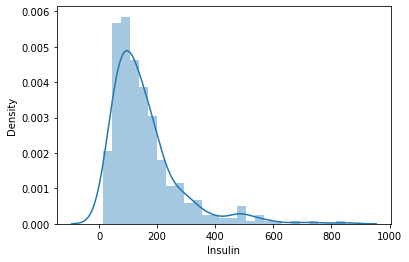

In [40]:
sns.distplot(train["Insulin"])

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Insulin'>

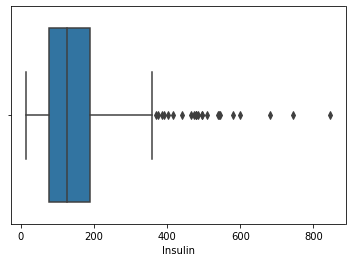

In [41]:
sns.boxplot(train["Insulin"])

In [42]:
desc = train["Insulin"].describe()
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [43]:
#IQR : 3IQR-1IQR
#OUT > 3IQR+(IQR * 1.5)
IQR = desc.loc["75%"] - desc.loc["25%"]
OUT = desc.loc["75%"] + (IQR*1.5)

In [44]:
train[train["Insulin"]>OUT].shape

(24, 9)

In [45]:
print(train.shape)
train = train[train["Insulin"]<OUT]
train.shape

(394, 9)


(370, 9)

학습,예측에 사용할 컬럼

In [46]:
#feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져온다.
feature_names = test.columns.tolist()
feature_names.remove("Insulin")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

정답값이자 예측해야될값

In [47]:
#label_name 이라는 변수에 예측할 컬럼의 이름을 담는다.

label_name = "Insulin"
label_name

'Insulin'

학습,예측 데이터셋만들기

In [48]:
#학습세트만들기
X_train = train[feature_names]
X_train.shape

(370, 8)

In [49]:
#정답값 만들기
y_train = train[label_name]
y_train.shape

(370,)

In [50]:
#예측에 사요할 데이터세트
X_test = test[feature_names]
X_test.shape

(374, 8)

In [51]:

#예측의 정답값
y_test = test[label_name]
y_test.shape

(374,)

머신러닝 알고리즘 가져오기

In [52]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model

DecisionTreeRegressor(random_state=42)

10  학습(훈련)
시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [53]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

cross validation 으로 학습 세트의 오차 측정하기

In [54]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, X_train,y_train, cv=5, verbose=2, n_jobs=-1)
y_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([ 25., 182.,  55., 144., 220.])

In [55]:
# 정답을 정확하게 맞춘 갯수
(y_predict == y_train).sum()

7

In [56]:
len(y_train)

370

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Insulin'>

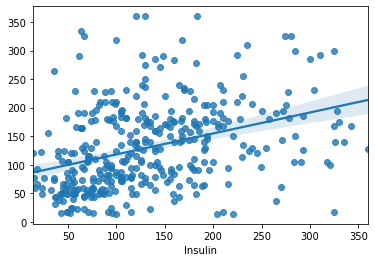

In [57]:
# regplot 으로 결과 값을 비교합니다
sns.regplot(y_train, y_predict)

In [58]:
# r2_score 를 구합니다.
from sklearn.metrics import r2_score
r2_score(y_train, y_predict)

-0.28551906710833275

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

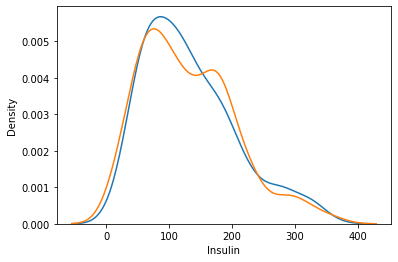

In [59]:
# distplot으로 정답값과 예측값의 분포를 그립니다.

sns.distplot(y_train, hist=False, label=("train"))
sns.distplot(y_predict, hist=False, label=("predict"))

12  오차 구하기

In [60]:
#MAE 에러의 평균오차
#86
#77.56
#62.056
error = abs(y_train - y_predict)
error.mean()

62.056756756756755

c:\users\kim\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

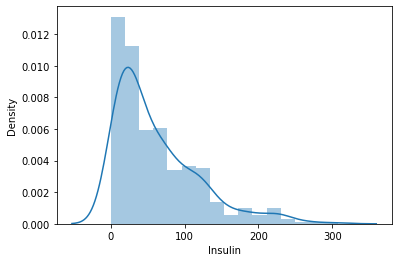

In [61]:
sns.distplot(error)

In [62]:
error.describe()

count    370.000000
mean      62.056757
std       56.854443
min        0.000000
25%       19.250000
50%       42.500000
75%       89.750000
max      307.000000
Name: Insulin, dtype: float64

In [63]:
#RMSE 표준편차 랑 비슷
#126.895
#114.077
#84.111
np.sqrt(((y_train - y_predict) ** 2).mean())

84.11142866717003

트리알고리즘 분석하기

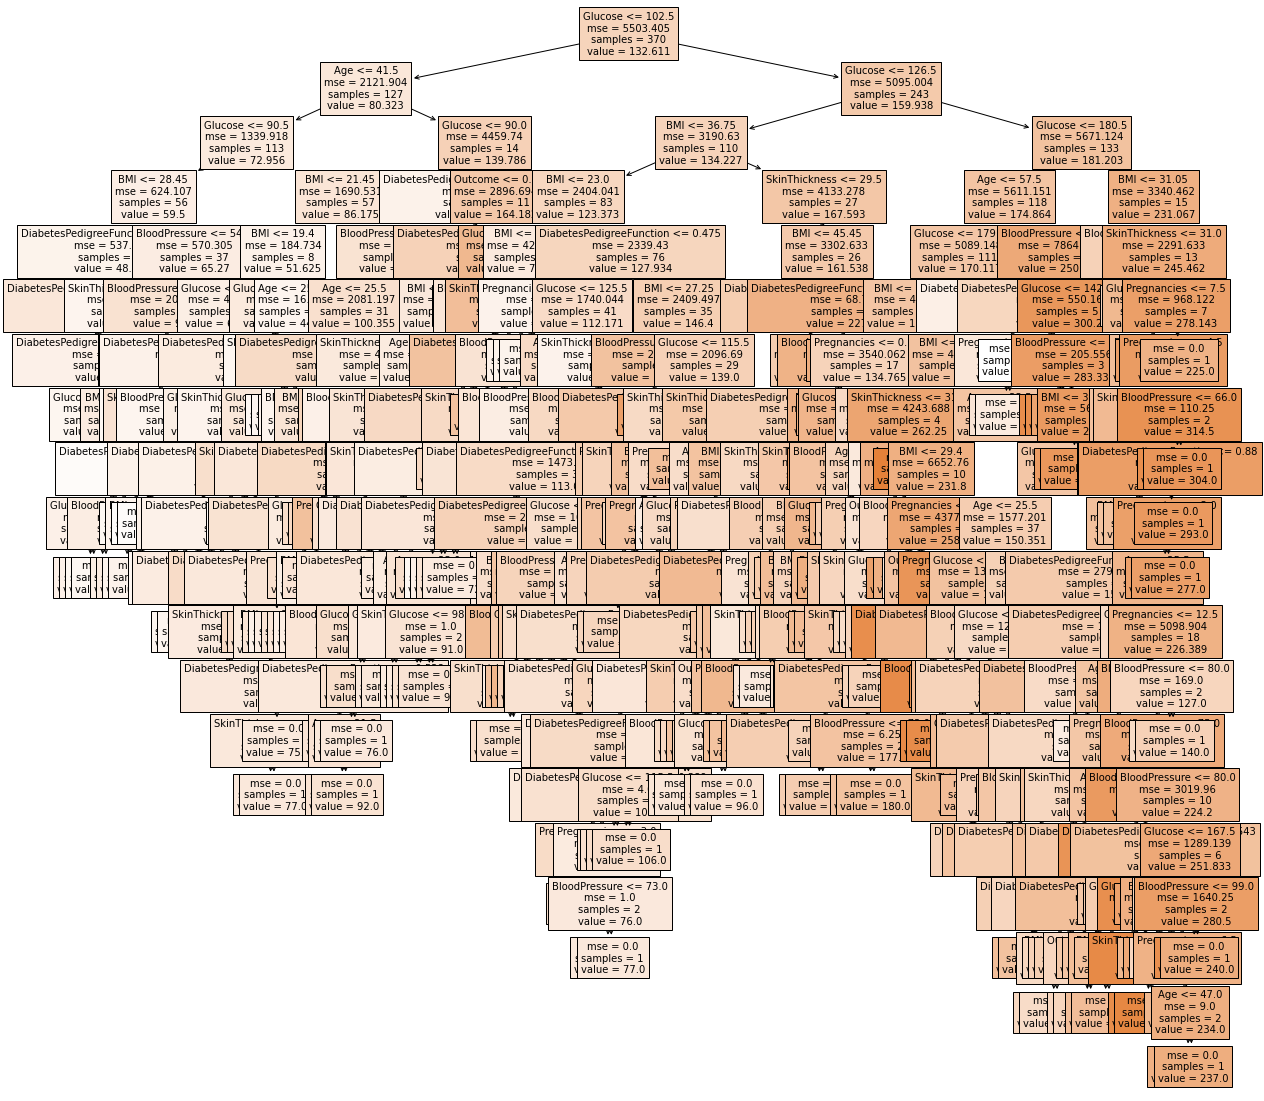

In [64]:
#plot_tree로 시각화 하기
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20)) 
tree = plot_tree(model, feature_names = feature_names, filled=True, fontsize=10)

In [65]:
#피처의 중요도 추출하기
model.feature_importances_

array([0.04858345, 0.44656558, 0.07097731, 0.05588694, 0.16087336,
       0.09607089, 0.11025783, 0.01078464])

<AxesSubplot:>

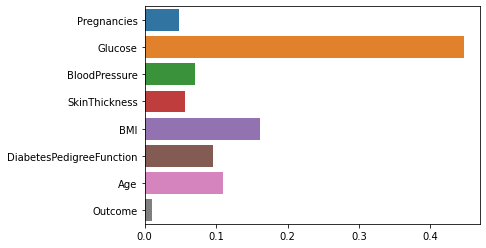

In [66]:
#피처의 중요도 시각화하기
sns.barplot(x=model.feature_importances_, y=feature_names)

예측

In [67]:
y_test = model.predict(X_test)
y_test[:5]

array([168.,  37., 130., 215., 165.])

In [68]:
train.groupby("Outcome")["Insulin"].agg(["mean", "median"])

,mean,median
Outcome,,
0,115.917323,100
1,169.163793,160


In [69]:
train.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,254.0,115.917323,69.844697,15.0,64.25,100.0,151.00,342.0
1,116.0,169.163793,70.789454,14.0,124.25,160.0,207.75,360.0


In [70]:
test["Insulin"] = y_test

In [71]:
test.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,124.906780,80.878263,18.0,64.00,97.5,155.0,335.0
1,138.0,163.724638,83.718835,14.0,96.75,145.0,215.0,328.0


<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

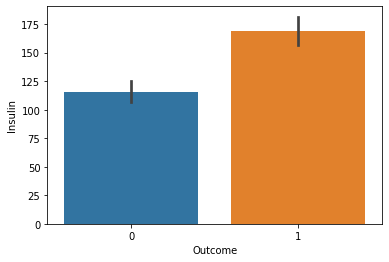

In [72]:
#Insulin 평균값 출력
sns.barplot(data=train, x="Outcome", y="Insulin")

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

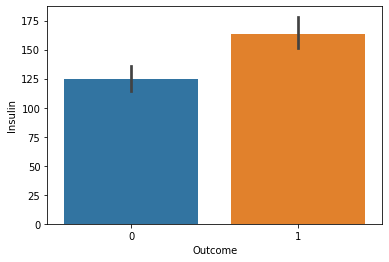

In [73]:
#예측값에 대해서 시각화
sns.barplot(data=test, x="Outcome", y="Insulin")